# CHAPTER 1 금융과 투자 영역의 머신러닝
* 머신러닝 기반의 투자 전략 의구심
    * 업무 특성상 성능 좋은 알고리즘이나 방법론이 공유되지 않는다
    * 검증 방법이 제한적이다.
        * 과거 데이터를 기반으로 하는 백테스트는 신뢰도가 높지 않다.
    * 양질의 데이터가 부족하다.
        * 고려해야 하는 경제 지표는 증가하는 반면 시계열 데이터 기반의 투자 자산 데이터는 양이 한정적이다.
        * ex> CLI, LEI, 국가별 GDP, 금리 자료 등
        * 시계열 대비 차원(dimension)의 수가 많아 좋은 성능을 가진 모델을 만들기가 힘들다.
## 1.1 AI, 금융, 투자의 삼자관계
* AI 기술이 활용되는 영역
    * 이상 탐지(금융 사기 탐지)
    * 리스크 평가 및 관리
    * 플랫폼 서비스 제공
    * 투자 관리
### 1.1.1 투자 자산의 다양화와 투자 목적의 개인화
* 로보어드바이저
    * robo-advisor
    * 개인 맞춤형 자산 관리
    * 아직은 개인화 수준이 낮고 추천하는 상품의 질도 높지 않다.
    * [국내 로보어드바이저 분석2021](https://www.kcmi.re.kr/report/report_view?report_no=1471)
    * [국내 로보어드바이저 올해 성적2023](https://www.sedaily.com/NewsView/29QPM5ENV3)
### 1.1.2 인간의 한계와 데이터 기반 투자 전력의 장점
* 복잡해지는 투자 환경에서 감에 기반한 투자 의사결정은 점점 힘을 잃어 갈 것
* AI는 투자 의사결정에서 중추적 역할을 담당
### 1.1.3 새로운 데이터가 창출하는 새로운 투자 기회
* 데이터의 종류와 양이 기하급수적으로 증가
* 머신러닝은 데이터 전처리 기술, 특성 공학(feature selection) 기술 등에 힘입어 투자 영역에 새 기회 창출

## 1.2 실제 투자 영역의 머신러닝 응용 사례
### 1.2.1 New York Life Investments
### 1.2.2 크래프트테크놀로지스
### 1.2.3 MAN AHL
### 1.2.4 Castle Ridge Asset Management
### 1.2.5 State Street Corporation

## 1.3 투자 영역에서 활용하는 알고리즘
### 1.3.1 머신러닝이란 무엇인가?
* 머신러닝이란?
    * 기계로 하여금 명확한 프로그래밍 가이드 없이 패턴을 찾아내도록 하는 알고리즘
    * 입력한 데이터를 해석하고 결과를 예측하는 법을 배운다.
### 1.3.2 머신러닝이 각광받는 이유
* 복잡한 현실세계를 모델링하기 위해서는 비선형 관계를 찾는 머신러닝 테크닉이 필요
* 데이터의 증가에 대응
    * 텍스트, 이미지, 음성 등 비정형 데이터 활용

## 1.4 투자 영역에서 활용하는 데이터
* 재무제표 데이터
    * 자산, 부채, 판매량, 비용/이익, 거시 변수
* 마켓 데이터
    * 가격/변동성, 거래량, 배당, 이자율, 상장/폐지
* 분석 데이터
    * 애널리스트 추천, 신용 등급, 이익 예측, 감정 분석
* 대체 데이터
    * 위성/CCTV 이미지, 구글 검색어, 트윗/SNS, 메타데이터
### 1.4.1 전통적인 금융 데이터
* 펀더멘털 데이터, 마켓 데이터, 분석형 데이터
    * 시계열 길이가 길지 않으므로 과적합이 일어날 수 있다.
    * 머신러닝 모델을 이용하려면 시계열 길이가 짧은 문제를 해결해야 한다.
### 1.4.2 대체 데이터
* 데이터 유용성 검증을 위한 여섯 가지 접근법
    * 신뢰성
    * 세분화
    * 효용성
    * 사용 범위
    * 행동 가능성
    * 희소성


In [1]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
battery_trends = pd.read_csv('../data/ch01/trend_ecopro.csv', parse_dates=True, index_col='Date')
ecopro = fdr.DataReader('086520', start='2022-06')[['Close']]
merge_df = pd.concat([battery_trends, ecopro], axis=1, join='outer').fillna(method='ffill').dropna()

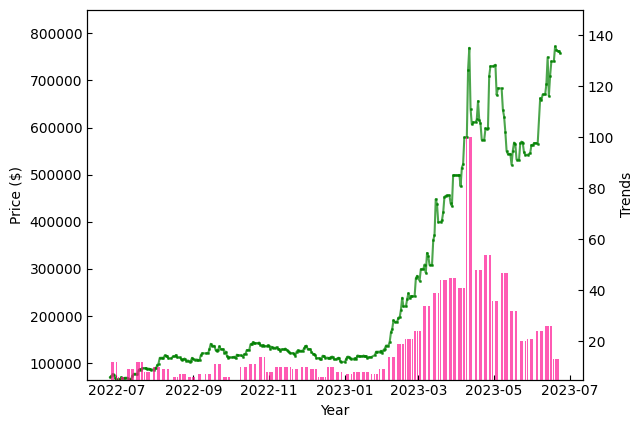

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(merge_df.index, merge_df['Close'], '-s', color='green', markersize=1, alpha=0.7, label='Price')
ax1.set_ylim(merge_df['Close'].min(), merge_df['Close'].max()*1.1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(merge_df.index, merge_df['Trend'], color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(merge_df['Trend'].min(), merge_df['Trend'].max()*1.5)
ax2.set_ylabel('Trends')
ax2.tick_params(axis='y', direction='in')

plt.show()

In [4]:
merge_df.corr()

,Trend,Close
Trend,1.000000,0.740785
Close,0.740785,1.000000


* 연준 자산
    * [연준 자산 관련 최근 기사](http://www.economy21.co.kr/news/articleView.html?idxno=1011645)
    * ![frb asset](images/frb_asset.png)

In [10]:
fed_asset = fdr.DataReader('FRED:WALCL', start='2000') # frb asset
tga= fdr.DataReader('FRED:WTREGEN', start='2000')*1000 # 재무부 계좌 잔액, 매일 발표
rrp = fdr.DataReader('FRED:RRPONTSYD', start='2000')*1000 # rrp 계좌, 매일 발표
reserve = fdr.DataReader('FRED:WRESBAL', start='2000')*1000 # 지급준비금, 1주일마다 발표

sp500 = fdr.DataReader('US500', start='2000')[['Close']] # s&p500
sp500.rename(columns = {'Close' : 'SP500'}, inplace = True)

<Axes: >

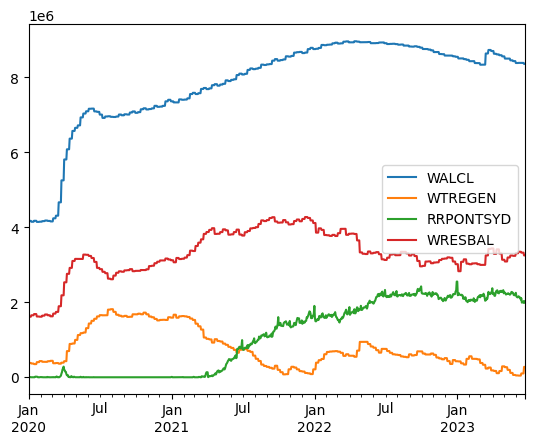

In [15]:
merge_df = pd.concat([fed_asset, tga, rrp, reserve, sp500], join='outer', axis=1).ffill();
merge_df['PURE_QE'] = merge_df['WALCL'] - merge_df['WTREGEN'] - merge_df['RRPONTSYD']
merge_df.loc['2020':, ~merge_df.columns.isin(['SP500', 'PURE_QE'])].plot()

In [14]:
merge_df.loc['2020':, ['SP500', 'PURE_QE', 'WALCL', 'WRESBAL']].corr()

,SP500,PURE_QE,WALCL,WRESBAL
SP500,1.000000,0.814356,0.747199,0.794762
PURE_QE,0.814356,1.000000,0.846162,0.982294
WALCL,0.747199,0.846162,1.000000,0.763527
WRESBAL,0.794762,0.982294,0.763527,1.000000


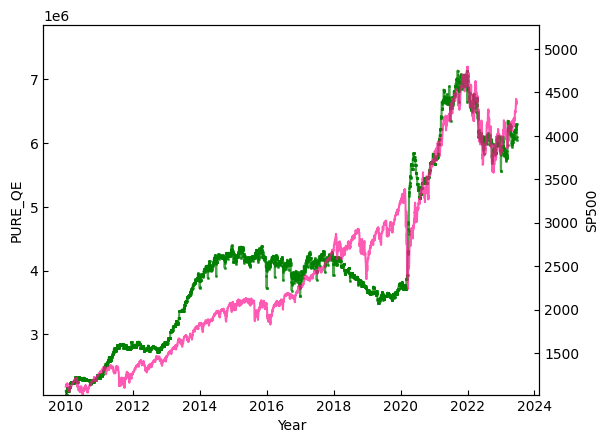

In [16]:
merge_df = merge_df.loc['2010':]
fig, ax1 = plt.subplots()
ax1.plot(merge_df.index, merge_df['PURE_QE'], '-s', color='green', markersize=1, alpha=0.7, label='Pure QE')
# ax1.plot(merge_df.index, merge_df['WRESBAL'], '-s', color='green', markersize=1, alpha=0.7, label='Reserve')
ax1.set_ylim(merge_df['PURE_QE'].min(), merge_df['PURE_QE'].max()*1.1)
# ax1.set_ylim(merge_df['WRESBAL'].min(), merge_df['WRESBAL'].max()*1.1)
ax1.set_xlabel('Year')
ax1.set_ylabel('PURE_QE')
# ax1.set_ylabel('Reserve')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(merge_df.index, merge_df['SP500'], color='deeppink', markersize=1, alpha=0.7, label='SP500')
ax2.set_ylim(merge_df['SP500'].min(), merge_df['SP500'].max()*1.1)
ax2.set_ylabel('SP500')
ax2.tick_params(axis='y', direction='in')

plt.show()

## 1.5 마치며
* AI 투자의 가능성과 한계!!